In [2]:
from pprint import pprint
from sympy import *
from numpy import diag, diagflat, dot
import numpy as np

beta = 2
alfa = beta*10**(-3)
L = 16
nos_internos = 33
deltaX = (L/(nos_internos-1))
deltaT = (deltaX**2)/(2*alfa)
Ci = 1/10000
Ce = 1.2
t = 0

def espaço_interno(nos_interior):
    return L / (nos_interior+1)
    
def constante_pvc_dp(alfa, deltaT, deltaX):
    return 1+((2*alfa*deltaT)/(deltaX**2))

def constante_pvc_dp_ut(alfa, deltaT, deltaX):
    return 1+((alfa*deltaT)/(deltaX**2))

def constante_pvc_vizinhos(alfa, deltaT, deltaX):
    return -((alfa*deltaT)/(deltaX**2))


def gauss_jacobi(matriz_A, matriz_x, matriz_b):

    matriz_D = diag(matriz_A)
    matriz_R = matriz_A - diagflat(matriz_D)

    for i in range(50):
        matriz_x = (matriz_b - dot(matriz_R, matriz_x)) / matriz_D
    return matriz_x


def sistema_pvc(nos_interior, alfa, deltaT, deltaX, t):

    linha_A = [0] * nos_interior
    matriz_A = [linha_A] * nos_interior
    tmax = 10*deltaT
    iteracao = 0
    
    a = round(constante_pvc_vizinhos(alfa, deltaT, deltaX), 2)
    b = 0
    
    print("DeltaX: ", deltaX)
    print("DeltaT: ", deltaT)
    print("T: ", t)
    print("Tmax: ", tmax)

    while(t < tmax):
        matriz_x = []
        matriz_b = []
        for l in range(nos_interior):
            linha = []

            for c in range(nos_interior):
                if l == nos_interior-1 & c == nos_interior-1:
                    linha.append(constante_pvc_dp_ut(alfa, deltaT, deltaX))
                elif c == l:
                    linha.append(constante_pvc_dp(alfa, deltaT, deltaX))
                elif (c == l - 1) | (c - 1 == l):
                    linha.append(a)
                else:
                    linha.append(b)

            matriz_A[l] = linha

        print("\nMatriz A:")
        print(np.matrix(matriz_A))

        
        for l in range(nos_interior):
            if l == 0:
                matriz_b.append(round(((alfa*deltaT)/(deltaX**2))*Ce, 2))
            else:
                matriz_b.append(0)

        print("\nMatriz b:")
        print(matriz_b)


        if(t == 0):
            for l in range(nos_interior):
                matriz_x.append(1)

        else:
            matriz_x = vetor_solucao

        print("\nMatriz x:")
        print(matriz_x)

        matriz_solucao = gauss_jacobi(matriz_A, matriz_x, matriz_b)
        print("\nMatriz solucao:")

        i = 2
        j = 0
        while i <= nos_interior + 1:
            print("C{} = {}".format(i, matriz_solucao[j]))
            i += 1
            j += 1

        vetor_solucao = []
        for i in range(nos_interior):
            vetor_solucao.append(matriz_solucao[i])

        t += deltaT
        iteracao += 1

    print("Quantidade iteracao: ", iteracao)
    return vetor_solucao


resultadoPVC = sistema_pvc(nos_internos, alfa, deltaT, deltaX, t)

DeltaX:  0.5
DeltaT:  62.5
T:  0
Tmax:  625.0

Matriz A:
[[ 2.  -0.5  0.  ...  0.   0.   0. ]
 [-0.5  2.  -0.5 ...  0.   0.   0. ]
 [ 0.  -0.5  2.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  2.  -0.5  0. ]
 [ 0.   0.   0.  ... -0.5  2.  -0.5]
 [ 0.   0.   0.  ...  0.  -0.5  1.5]]

Matriz b:
[0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Matriz x:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Matriz solucao:
C2 = 0.3215390309173473
C3 = 0.08615612366938918
C4 = 0.023085463760209
C5 = 0.0061857313714462495
C6 = 0.001657461725575239
C7 = 0.00044411553085378706
C8 = 0.00011900039783884515
C9 = 3.188606050039309e-05
C10 = 8.543844161417308e-06
C11 = 2.2893161438631897e-06
C12 = 6.13420412545517e-07
C13 = 1.6436550475729463e-07
C14 = 4.404160487294688e-08
C15 = 1.1800913078073338e-08
C16 = 3.162045756045862e-09
C17 = 8.472682366886772e-10
C18 = 2.2702547222449993e-10
C19 = 6.083

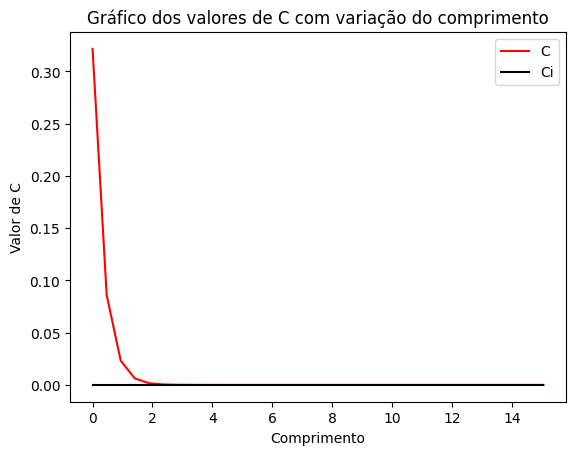

In [3]:
import matplotlib.pyplot as plt

vetor_comprimento = [0]
vetor_Ci = [Ci]
z = 0

while z <= nos_internos-2:
    vetor_comprimento.append(vetor_comprimento[z] + (espaço_interno(nos_internos)))
    vetor_Ci.append(Ci)
    z += 1


def grafico_PVC():

    plt.title("Gráfico dos valores de C com variação do comprimento")
    plt.plot(vetor_comprimento, resultadoPVC, color="red", label="C")
    plt.plot(vetor_comprimento, vetor_Ci, color="black", label="Ci")
    plt.legend()
    plt.xlabel("Comprimento")
    plt.ylabel("Valor de C")
    plt.show()

grafico_PVC()

DeltaX:  0.5
DeltaT:  62.5
T:  0
Tmax:  625.0

Matriz A:
[[ 2.  -0.5  0.  ...  0.   0.   0. ]
 [-0.5  2.  -0.5 ...  0.   0.   0. ]
 [ 0.  -0.5  2.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  2.  -0.5  0. ]
 [ 0.   0.   0.  ... -0.5  2.  -0.5]
 [ 0.   0.   0.  ...  0.  -0.5  1.5]]

Matriz b:
[0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Matriz x:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Matriz solucao:
C2 = 0.3215390309173473
C3 = 0.08615612366938918
C4 = 0.023085463760209
C5 = 0.0061857313714462495
C6 = 0.001657461725575239
C7 = 0.00044411553085378706
C8 = 0.00011900039783884515
C9 = 3.188606050039309e-05
C10 = 8.543844161417308e-06
C11 = 2.2893161438631897e-06
C12 = 6.13420412545517e-07
C13 = 1.6436550475729463e-07
C14 = 4.404160487294688e-08
C15 = 1.1800913078073338e-08
C16 = 3.162045756045862e-09
C17 = 8.472682366886772e-10
C18 = 2.2702547222449993e-10
C19 = 6.083

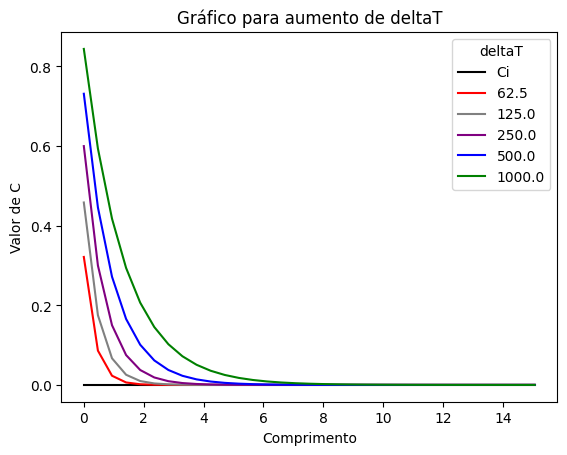

In [4]:
def diferentes_deltaT():
    vetor_deltaT = [deltaT]
    
    for i in range(0, 4):
        vetor_deltaT.append(vetor_deltaT[i]*2)
    
    plt.plot(vetor_comprimento, vetor_Ci, color="black", label="Ci")

    for i in range(0, 5):
        cor = ["red", "grey", "purple", "blue", "green"]
        resultados_PVC = sistema_pvc(nos_internos, alfa, vetor_deltaT[i], deltaX, t)
        plt.plot(
            vetor_comprimento, resultados_PVC, color=cor[i], label=round(vetor_deltaT[i], 2)
        )
        plt.legend(title="deltaT")
        plt.xlabel("Comprimento")
        plt.ylabel("Valor de C")

    plt.title("Gráfico para aumento de deltaT")
    plt.show()


diferentes_deltaT()


DeltaX:  0.5
DeltaT:  62.5
T:  0
Tmax:  625.0

Matriz A:
[[ 2.  -0.5  0.  ...  0.   0.   0. ]
 [-0.5  2.  -0.5 ...  0.   0.   0. ]
 [ 0.  -0.5  2.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  2.  -0.5  0. ]
 [ 0.   0.   0.  ... -0.5  2.  -0.5]
 [ 0.   0.   0.  ...  0.  -0.5  1.5]]

Matriz b:
[0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Matriz x:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Matriz solucao:
C2 = 0.3215390309173473
C3 = 0.08615612366938918
C4 = 0.023085463760209
C5 = 0.0061857313714462495
C6 = 0.001657461725575239
C7 = 0.00044411553085378706
C8 = 0.00011900039783884515
C9 = 3.188606050039309e-05
C10 = 8.543844161417308e-06
C11 = 2.2893161438631897e-06
C12 = 6.13420412545517e-07
C13 = 1.6436550475729463e-07
C14 = 4.404160487294688e-08
C15 = 1.1800913078073338e-08
C16 = 3.162045756045862e-09
C17 = 8.472682366886772e-10
C18 = 2.2702547222449993e-10
C19 = 6.083

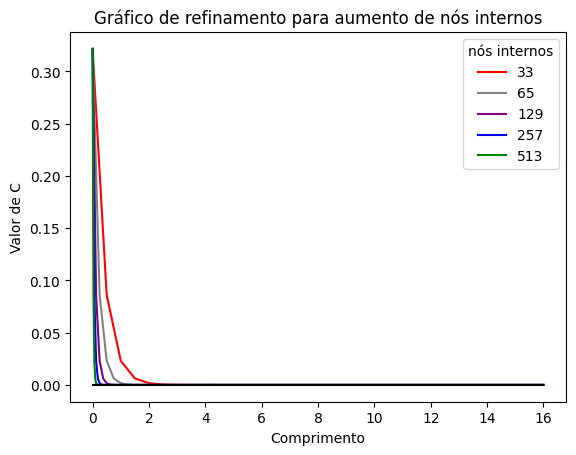

In [5]:
def refinamento():
    vetor_nos_internos = [nos_internos]

    for i in range(0, 4):
        vetor_nos_internos.append(((vetor_nos_internos[i]-1)*2)+1)

    for i in range(0, 5):

        vetor_comprimento = [0]
        vetor_Ci = [Ci]
        z = 0

        while z <= vetor_nos_internos[i]-2:
            vetor_comprimento.append(vetor_comprimento[z] + (espaço_interno(vetor_nos_internos[i]-2)))
            vetor_Ci.append(Ci)
            z += 1
            
        cor = ["red", "grey", "purple", "blue", "green"]
        resultados_PVC = sistema_pvc(vetor_nos_internos[i], alfa, deltaT, deltaX, t)
        plt.title("Gráfico dos valores de C com variação do comprimento")
        plt.plot(vetor_comprimento, resultados_PVC, color=cor[i], label=vetor_nos_internos[i])
        plt.legend(title="nós internos")
        plt.xlabel("Comprimento")
        plt.ylabel("Valor de C")
    
    plt.plot(vetor_comprimento, vetor_Ci, color="black", label="Ci")
    plt.title("Gráfico de refinamento para aumento de nós internos")
    plt.show()


refinamento()

DeltaX:  0.5
DeltaT:  62.5
T:  0
Tmax:  625.0

Matriz A:
[[ 2.  -0.5  0.  ...  0.   0.   0. ]
 [-0.5  2.  -0.5 ...  0.   0.   0. ]
 [ 0.  -0.5  2.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  2.  -0.5  0. ]
 [ 0.   0.   0.  ... -0.5  2.  -0.5]
 [ 0.   0.   0.  ...  0.  -0.5  1.5]]

Matriz b:
[0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Matriz x:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Matriz solucao:
C2 = 0.3215390309173473
C3 = 0.08615612366938918
C4 = 0.023085463760209
C5 = 0.0061857313714462495
C6 = 0.001657461725575239
C7 = 0.00044411553085378706
C8 = 0.00011900039783884515
C9 = 3.188606050039309e-05
C10 = 8.543844161417308e-06
C11 = 2.2893161438631897e-06
C12 = 6.13420412545517e-07
C13 = 1.6436550475729463e-07
C14 = 4.404160487294688e-08
C15 = 1.1800913078073338e-08
C16 = 3.162045756045862e-09
C17 = 8.472682366886772e-10
C18 = 2.2702547222449993e-10
C19 = 6.083

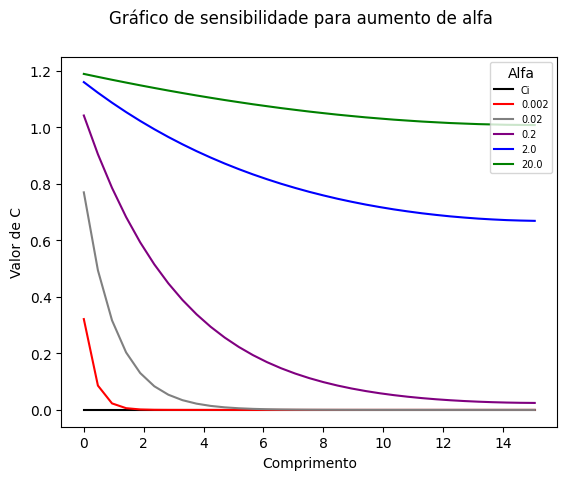

In [6]:
def sensibilidade():

    vetor_alfa = [alfa]

    for i in range(0, 4):
        vetor_alfa.append(vetor_alfa[i] * 10)

    plt.plot(vetor_comprimento, vetor_Ci, color="black", label="Ci")

    for i in range(0, 5):

        cor = ["red", "grey", "purple", "blue", "green"]

        resultado_PVC_alpha = sistema_pvc(nos_internos, vetor_alfa[i], deltaT, deltaX, t)

        plt.plot(
            vetor_comprimento,
            resultado_PVC_alpha,
            color=cor[i],
            label=round(vetor_alfa[i], 6),
        )
        plt.legend(title="Alfa", fontsize=7)
        plt.xlabel("Comprimento")
        plt.ylabel("Valor de C")


    plt.suptitle("Gráfico de sensibilidade para aumento de alfa")
    plt.show()


sensibilidade()